In [1]:
# project: p9
# submitter: RMM052, RMichaelis2
# partner: mprine2
# hours:

In [2]:
import csv
import copy 
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

# copied from https://automatetheboringstuff.com/chapter14/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [3]:
def get_mapping(path):
    # use process_csv to pull out the header and data rows
    csv_rows = process_csv(path)
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    
    mapping_dictionary = {}
    for row in csv_rows:
        if row[0] not in mapping_dictionary:
            mapping_dictionary[row[0]] = row[1]
        else:
            continue
    return mapping_dictionary

def get_raw_movies(path):
    # use process_csv to pull out the header and data rows
    csv_rows = process_csv(path)
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    
    movie_dictionary_list = []
    for row in csv_data:
        column_count = 0
        movie_dictionary = {}
        for item in row:
            movie_dictionary[csv_header[column_count]] = item
            #print(movie_dictionary.get('year'))
            column_count += 1
        movie_dictionary.update({'year' : int(movie_dictionary.get('year'))})
        movie_dictionary.update({'duration' : int(movie_dictionary.get('duration'))})
        movie_dictionary.update({'rating' : float(movie_dictionary.get('rating'))})
        genre_list = list(movie_dictionary.get('genres').split(", "))
        movie_dictionary.update({'genres' : genre_list})
        director_list = list(movie_dictionary.get('directors').split(", "))
        movie_dictionary.update({'directors' : director_list})
        actor_list = list(movie_dictionary.get('actors').split(", "))
        movie_dictionary.update({'actors' : actor_list})
        #print(movie_dictionary)
        movie_dictionary_list.append(movie_dictionary)
    return movie_dictionary_list

def get_movies(movie_path, mapping_path):
    movie_dict = get_raw_movies(movie_path)
    mapping = get_mapping(mapping_path)
    
    for d in movie_dict:
        #lookup title and change the value
        d["title"] = mapping[d["title"]]
        
        #lookup directors
        for i in range(len(d["directors"])):
            d["directors"][i] = mapping[d["directors"][i]]
            
        #lookup actors
        for i in range(len(d["actors"])):
            d["actors"][i] = mapping[d["actors"][i]]
    
    return movie_dict
movies = get_movies("movies.csv", "mapping.csv")
movies

[{'title': 'Snow White and the Huntsman',
  'year': 2012,
  'genres': ['Action', 'Adventure', 'Drama'],
  'duration': 127,
  'directors': ['Rupert Sanders'],
  'actors': ['Kristen Stewart',
   'Chris Hemsworth',
   'Charlize Theron',
   'Sam Claflin'],
  'rating': 6.1},
 {'title': 'Moneyball',
  'year': 2011,
  'genres': ['Biography', 'Drama', 'Sport'],
  'duration': 133,
  'directors': ['Bennett Miller'],
  'actors': ['Brad Pitt',
   'Jonah Hill',
   'Philip Seymour Hoffman',
   'Robin Wright'],
  'rating': 7.6},
 {'title': 'Face of the Screaming Werewolf',
  'year': 1964,
  'genres': ['Horror'],
  'duration': 60,
  'directors': ['Gilberto Martínez Solares', 'Rafael Portillo'],
  'actors': ['Lon Chaney Jr.',
   'Yerye Beirute',
   'George Mitchell',
   'Fred Hoffman'],
  'rating': 3.0},
 {'title': 'June 9',
  'year': 2008,
  'genres': ['Horror', 'Mystery', 'Thriller'],
  'duration': 95,
  'directors': ['T. Michael Conway'],
  'actors': ['Jon Ray', 'Trevor Williams', 'Maggie Blazunas']

In [4]:
#q1 Find the average rating for movies with less than 5 actors/actresses?
movie_count = 0
movie_rating_pool = 0
for movie in movies:
    if len(movie['actors']) < 5:
        movie_rating_pool += movie['rating']
        movie_count += 1
movie_rating_pool/movie_count

5.610010813644878

In [5]:
#q2 Find the average rating for movies with at least 5 actors/actresses?
movie_count = 0
movie_rating_pool = 0
for movie in movies:
    if len(movie['actors']) >= 5:
        movie_rating_pool += movie['rating']
        movie_count += 1
movie_rating_pool/movie_count

5.64560928433269

In [6]:
movie_count = 0
movie_rating_pool = 0
for movie in movies:
    if movie['title'].lower().startswith('a'):
        movie_rating_pool += movie['rating']
        movie_count += 1
movie_rating_pool/movie_count

5.511147540983598

In [7]:
#q3 What is the average rating of movies which start with the letter 'a' (case insensitive)?
def avg_rating_name_starts_with(movies, x):
    total_movies = 0
    count = 0
    x = x.upper()
    for movie_dict in movies:
        title = movie_dict['title']
        first_char = title[0].upper()
        if first_char == '"':
            first_char = title[1].upper()
        if first_char == x:
            total_movies += movie_dict['rating']
            count += 1
    return total_movies/count
avg_rating_name_starts_with(movies, 'a')

5.511147540983598

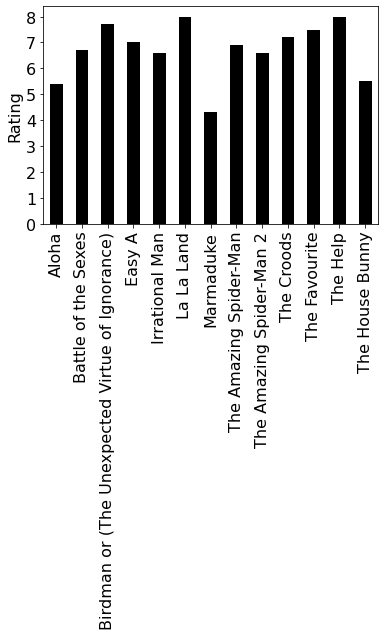

In [8]:
#q4 Plot the title vs rating of movies featuring "Emma Stone".
def get_actor_movie_ratings(actor):
    actor_movie_ratings = {}
    for movie in movies:
        if actor in movie['actors']:
            actor_movie_ratings[movie['title']] = movie['rating']
    #print(actor_movie_ratings)
    plot_dict(actor_movie_ratings, 'Rating')
get_actor_movie_ratings('Emma Stone')

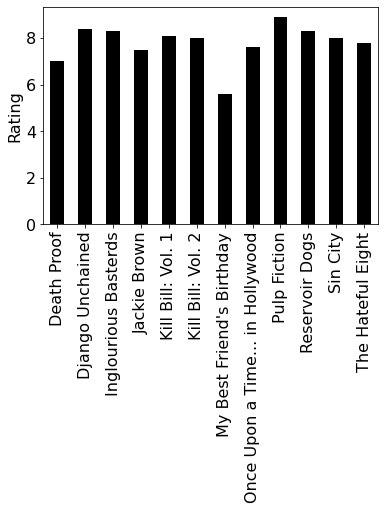

In [9]:
#q5 Plot the title vs rating of movies directed by "Quentin Tarantino".
def get_director_movie_ratings(director):
    director_movie_ratings = {}
    for movie in movies:
        if director in movie['directors']:
            director_movie_ratings[movie['title']] = movie['rating']
    #print(director_movie_ratings)
    plot_dict(director_movie_ratings, 'Rating')
get_director_movie_ratings('Quentin Tarantino')

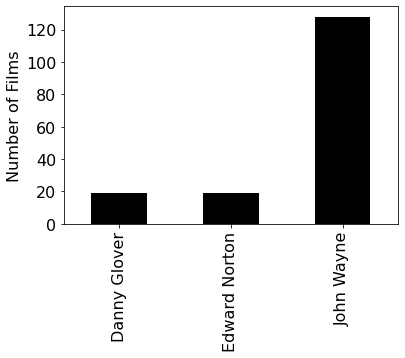

In [10]:
#q6 Plot the number of movies played by ["John Wayne", "Edward Norton", "Danny Glover"].
def get_actor_movie_number(actor, actor2='', actor3=''):
    actor_movie_number = {}
    actor1_count = 0
    actor2_count = 0
    actor3_count = 0
    for movie in movies:
        if actor in movie['actors']:
            actor1_count += 1
            actor_movie_number.update({actor : actor1_count})
        elif actor2 in movie['actors']:
            actor2_count += 1
            actor_movie_number.update({actor2 : actor2_count})
        elif actor3 in movie['actors']:
            actor3_count += 1
            actor_movie_number.update({actor3 : actor2_count})
        else:
            continue
    #print(actor_movie_number)
    plot_dict(actor_movie_number, 'Number of Films')
get_actor_movie_number('John Wayne', 'Edward Norton', 'Danny Glover')

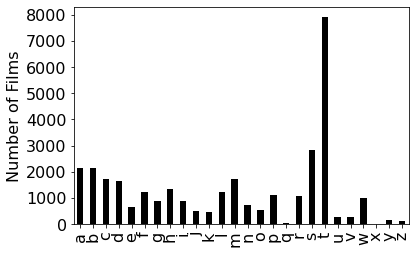

In [11]:
#q7 Plot the number of movies that start with each letter of the alphabet.
movie_title_starts_with = {}
keys = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for movie in movies:
    movie_count = 1
    if movie['title'][0].lower() in movie_title_starts_with:
        movie_title_starts_with[movie['title'][0].lower()] += 1
    else:
        movie_title_starts_with[movie['title'][0].lower()] = movie_count
sorted_titles_by_letter = sorted(movie_title_starts_with.items())
sorted_dictionary = dict((k, dict(sorted_titles_by_letter)[k]) for k in keys)
plot_dict(sorted_dictionary, 'Number of Films')

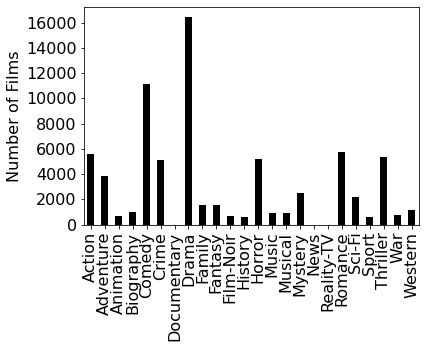

In [12]:
#q8: Plot the number of movies there are for each genre.
movie_genre_count = {}
for movie in movies:
    movie_count = 1
    for genre in movie['genres']:
        if genre in movie_genre_count:
            movie_genre_count[genre] += 1
        else:
            movie_genre_count[genre] = movie_count
plot_dict(movie_genre_count, 'Number of Films')

In [13]:
#q9 For each letter of the alphabet, what is the average rating of movies that start with that letter (case insensitive)?
movie_title_starts_with_rating = {}
keys = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
movie_count = 0
for movie in movies:
    movie_count += 1
    if movie['title'][0].lower() in movie_title_starts_with_rating:
        movie_title_starts_with_rating[movie['title'][0].lower()].append(movie['rating'])
    else:
        movie_title_starts_with_rating[movie['title'][0].lower()] = [movie['rating']]
sorted_titles_by_letter = sorted(movie_title_starts_with_rating.items())
sorted_dictionary = dict((k, dict(sorted_titles_by_letter)[k]) for k in keys)
for key in sorted_dictionary:
    sorted_dictionary.update({key : sum(sorted_dictionary.get(key))/len(sorted_dictionary.get(key))})
sorted_dictionary
#plot_dict(sorted_dictionary, 'Average Rating')

{'a': 5.511147540983598,
 'b': 5.534792734047502,
 'c': 5.533487297921478,
 'd': 5.306042296072506,
 'e': 5.527586206896553,
 'f': 5.550164473684206,
 'g': 5.591002277904327,
 'h': 5.565530022238699,
 'i': 5.661092150170649,
 'j': 5.7286561264822105,
 'k': 5.453761061946899,
 'l': 5.681399176954736,
 'm': 5.740911713791118,
 'n': 5.538386648122391,
 'o': 5.72813067150635,
 'p': 5.537211367673185,
 'q': 5.615254237288137,
 'r': 5.562799263351744,
 's': 5.5558245614035195,
 't': 5.768541456016157,
 'u': 5.635842293906811,
 'v': 5.301162790697679,
 'w': 5.738674579624128,
 'x': 5.690909090909093,
 'y': 5.845142857142855,
 'z': 5.050943396226414}

In [14]:
#q10 What is the average movie rating for each genre?
movie_genre_rating = {}
for movie in movies:
    for genre in movie['genres']:
        if genre in movie_genre_rating:
            movie_genre_rating[genre].append(movie['rating'])
        else:
            movie_genre_rating[genre] = [movie['rating']]
#sorted_titles_by_letter = sorted(movie_genre_rating.items())
sorted_dictionary = dict(movie_genre_rating)
for key in movie_genre_rating:
    sorted_dictionary.update({key : sum(movie_genre_rating.get(key))/len(movie_genre_rating.get(key))})
sorted_dictionary

{'Action': 5.338050258420967,
 'Adventure': 5.746479605092239,
 'Drama': 5.982285191956112,
 'Biography': 6.608622398414282,
 'Sport': 5.914867256637162,
 'Horror': 4.582376811594196,
 'Mystery': 5.640863251311018,
 'Thriller': 5.1262921348314645,
 'Comedy': 5.721581311769968,
 'Family': 5.684858044164039,
 'Romance': 6.0585086042065,
 'Crime': 5.847321780228442,
 'Western': 5.996176720475778,
 'Fantasy': 5.464606376057261,
 'Animation': 6.1353550295857975,
 'Sci-Fi': 4.901396648044689,
 'Film-Noir': 6.638948995363209,
 'History': 6.45741626794258,
 'War': 6.190500641848522,
 'Musical': 6.151965993623801,
 'Music': 6.07092511013216,
 'News': 6.4,
 'Documentary': 7.5,
 'Reality-TV': 2.1}

In [15]:
#q11 How many movies in each genre have a rating of above 8? (rating > 8)
movie_genre_count = {}
for movie in movies:
    movie_count = 1
    for genre in movie['genres']:
        if genre in movie_genre_count:
            if movie['rating'] > 8:
                movie_genre_count[genre] += 1
        else:
            if movie['rating'] > 8:
                movie_genre_count[genre] = movie_count
movie_genre_count

{'Action': 40,
 'Adventure': 45,
 'Drama': 155,
 'Biography': 20,
 'Crime': 50,
 'Mystery': 24,
 'Thriller': 32,
 'Comedy': 50,
 'Animation': 12,
 'Family': 10,
 'Sport': 6,
 'History': 12,
 'Musical': 9,
 'Western': 8,
 'Music': 8,
 'Romance': 24,
 'Sci-Fi': 19,
 'Fantasy': 10,
 'Film-Noir': 4,
 'War': 14,
 'Horror': 6}

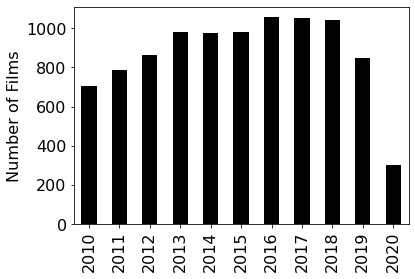

In [16]:
#q12 Plot the number of movies that were released each year in the last decade (2010<= year <=2020)
def movies_in_year(year_min, year_max):
    movie_year_count = {}
    for movie in movies:
        movie_count = 1
        if movie['year'] >= year_min and movie['year'] <= year_max:
            if movie['year'] in movie_year_count:
                movie_year_count[movie['year']] += 1
            else:
                movie_year_count[movie['year']] = movie_count
    return plot_dict(movie_year_count, 'Number of Films')
movies_in_year(2010, 2020)

In [17]:
#q13 Which year (or years) had the highest number of movie releases?
movie_year_count = {}
for movie in movies:
    movie_count = 1
    if movie['year'] in movie_year_count:
        movie_year_count[movie['year']] += 1
    else:
        movie_year_count[movie['year']] = movie_count
top_movie_years = [max(movie_year_count, key=movie_year_count.get)]
#movie_year_count
top_movie_years

[2016]

In [18]:
#q14 Which 3 genres have the least number of movies? (the lowest first)
movie_genre_count = {}
for movie in movies:
    movie_count = 1
    for genre in movie['genres']:
        if genre in movie_genre_count:
            movie_genre_count[genre] += 1
        else:
            movie_genre_count[genre] = movie_count
sorted_dictionary = dict(sorted(movie_genre_count.items(), key=lambda item: item[1], reverse=False))
list(sorted_dictionary.keys())[:3]

['News', 'Documentary', 'Reality-TV']

In [19]:
#q15 Which 3 genres have the most number of movies?
most_movies_genre_list = list(sorted_dictionary.keys())[-3:]
most_movies_genre_list.reverse()
most_movies_genre_list

['Drama', 'Comedy', 'Romance']

In [20]:
#q16 Which actor/actress has been featured in the most number of movies?
movie_actor_count = {}
for movie in movies:
    movie_count = 1
    for actor in movie['actors']:
        if actor in movie_actor_count:
            movie_actor_count[actor] += 1
        else:
            movie_actor_count[actor] = movie_count
max(movie_actor_count, key=movie_actor_count.get)

'John Wayne'

In [21]:
#q17 Which 10 actors/actresses are featured in the most number of movies? (The actor/actress featured in the most movies should be outputted first)
sorted_movie_actor_count = list(dict(sorted(movie_actor_count.items(), key=lambda item: item[1], reverse=False)))[-10:]
sorted_movie_actor_count.reverse()
sorted_movie_actor_count

['John Wayne',
 'Eric Roberts',
 'Barbara Stanwyck',
 'William Boyd',
 'Randolph Scott',
 'Robert De Niro',
 'Nicolas Cage',
 'Glenn Ford',
 'Robert Mitchum',
 'Michael Madsen']

In [22]:
#q18 How many actors/actresses have only acted in only 1 movie?
sorted_movie_actor_count = dict(sorted(movie_actor_count.items(), key=lambda item: item[1], reverse=False))
sorted_movie_actor_count_list = [k for k, v in sorted_movie_actor_count.items() if v==1]
len(sorted_movie_actor_count_list)

25546

In [23]:
#q19 What are the titles of the top 5 rated movies in the dataset?
def get_top_rated_movies(num):
    top_rated_movies = list(sorted(movies, key = lambda d : d['rating'], reverse = True))
    top_num_movies = top_rated_movies[:num]
    top_names = list(map(lambda d : d['title'], top_num_movies))
    return(top_names)
get_top_rated_movies(5)

['Hopeful Notes',
 'The Moving on Phase',
 'Love in Kilnerry',
 'The Shawshank Redemption',
 'As I Am']

In [24]:
#q20 What are the titles of the bottom 13 rated movies in the dataset?
def get_bottom_rated_movies(num):
    bottom_rated_movies = list(sorted(movies, key = lambda d : d['rating'], reverse = False))
    #print(bottom_rated_movies[:13])
    bottom_num_movies = bottom_rated_movies[:num]
    bottom_names = list(map(lambda d : d['title'], bottom_num_movies))
    return(bottom_names)
get_bottom_rated_movies(13)

['A Moment of Youth',
 'Proud American',
 'The Time Machine (I Found at a Yardsale)',
 'Troy: The Resurrection of Aeneas',
 'Browncoats: Independence War',
 'C Me Dance',
 'Cries of the Unborn',
 'Captain Battle: Legacy War',
 'Greyhound Attack',
 'The Maize 2: Forever Yours',
 'The Round and Round',
 'Fun in Balloon Land',
 'Rollergator']